In [ ]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('data_banknote_authentication.csv')

for col in data.columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

x = data.iloc[:,:2]

y = data.iloc[:, -1]

x, y = shuffle(x, y)

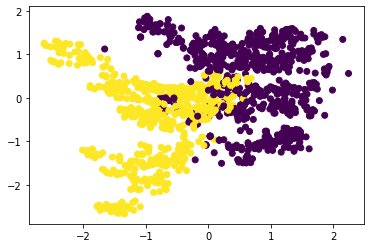

In [ ]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)
plt.show()

In [ ]:
def perceptron(x, y, lr=0.0001, iterations=100):
    w = np.random.randn(2)
    b = np.random.randn(1)

    for _ in range(iterations):
        for i in range(len(x)):
            y_pred = 0
            for j in range(2):
                y_pred += x.iloc[i, j] * w[j]

            y_pred += b

            if y_pred >= 0:
                y_pred = 1
            else:
                y_pred = 0

            for j in range(2):
                w[j] += lr * (y.iloc[i] - y_pred) * x.iloc[i, j]
            b += lr * (y.iloc[i] - y_pred)
    return w, b

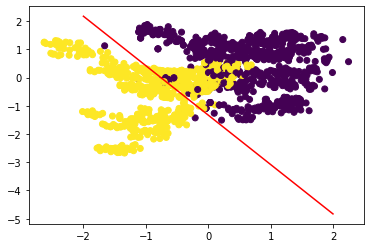

In [ ]:
w, b = perceptron(x, y)
x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'r')
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)
plt.show()

In [ ]:
def adaline(x, y, lr=0.00001):
    w = np.random.randn(2)
    b = np.random.randn(1)
    for _ in range(100):
      for i in range(len(x)):
          y_pred = np.zeros(len(x))
          for j in range(2):
                  y_pred[i] += x.iloc[i, j] * w[j]

          y_pred[i] += b
      w[0] = np.sum(lr * np.dot((y - y_pred) , x.iloc[:,0]) / len(x))
      w[1] = np.sum(lr * np.dot((y - y_pred) , x.iloc[:,1]) / len(x))
      b = np.sum(lr * (y - y_pred) / len(x))
    return w, b

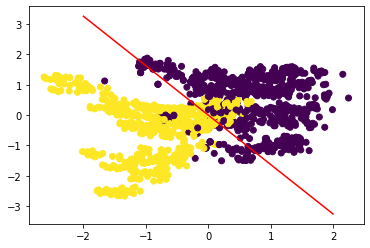

In [ ]:
w, b = adaline(x, y)
x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'r')
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)
plt.show()